In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image as mpimg
import os 

In [16]:
%store -r accuracy_values
%store -r accuracy_values_pca
%store -r accuracy_values_fs
%store -r precision_values
%store -r precision_values_pca
%store -r precision_values_fs
%store -r recall_values
%store -r recall_values_pca
%store -r recall_values_fs
%store -r f1_values
%store -r f1_values_pca
%store -r f1_values_fs

%store -r train
%store -r train_pca
%store -r train_fs

In [17]:
classifiers_info = {
    "Linear discriminant analysis": {
        "Parametres": "solver:['svd', 'lsqr', 'eigen'], shrinkage: [None, 'auto', 0.5, 1.0], cv_range = [3, 5, 7]",
        "PCA": "solver:['svd', 'lsqr', 'eigen'], shrinkage: [None, 'auto', 0.5, 1.0], cv_range = [3, 5, 7],n_components: [100, 120, 130, 140]",
        "FS": "solver:['svd', 'lsqr', 'eigen'], shrinkage: [None, 'auto', 0.5, 1.0], cv_range = [3, 5, 7]",
    },
    "Decision Tree": {
        "Parametres": "criterion: ['gini', 'entropy'],max_depth: list(range(1, 11)),min_samples_split: list(range(1, 6)),min_samples_leaf: list(range(2, 12, 2)), cv_range = [3, 7]",
        "PCA": "criterion: ['gini', 'entropy'],max_depth: list(range(1, 11)),min_samples_split: list(range(1, 6)),min_samples_leaf: list(range(2, 12, 2)), cv_range = [3, 7],n_components: [100, 120]",
        "FS": "criterion: ['gini', 'entropy'],max_depth: list(range(1, 11)),min_samples_split: list(range(1, 6)),min_samples_leaf: list(range(2, 12, 2)), cv_range = [3, 7]",
    },
    "Bagging Classifier": {
        "Parametres": "base_estimator__max_depth: [5, 10],n_estimators: [50, 100],max_samples: [0.25, 0.5],max_features: [0.5, 1.0], cv_range = [5, 10, 15]",
        "PCA": "base_estimator__max_depth: [5, 10],n_estimators: [50, 100],max_samples: [0.25, 0.5],max_features: [0.5, 1.0], cv_range = [5, 10, 15], n_components: [70, 80, 90, 100, 120, 130, 140, 150]",
        "FS": "base_estimator__max_depth: [5, 10],n_estimators: [50, 100],max_samples: [0.25, 0.5],max_features: [0.5, 1.0], cv_range = [5, 10, 15]",
    },
    "Perceptron Single Layer": {
        "Parametres": "StandardScaler(), Perceptron(eta0=0.001, penalty=l2), max_iter=3000, perceptron__alpha: np.logspace(-7, -3, num=5), cv_range = [3, 5], n_jobs = -1",
        "PCA": "StandardScaler(), Perceptron(eta0=0.001, penalty=l2), max_iter=3000, perceptron__alpha: np.logspace(-7, -3, num=5), cv_range = [3, 5], n_jobs = -1, pca_components_range = range(85, 100)", 
        "FS": "StandardScaler(), Perceptron(eta0=0.001, penalty=l2), max_iter=3000, perceptron__alpha: np.logspace(-7, -3, num=5), cv_range = [3, 5], n_jobs = -1, max_num_features_range = range(120, 100, -10)",
    },
    "Multi Layer Perceptron": {
        "Parametres": "StandardScaler(), MLPClassifier(activation='logistic', max_iter=3000),mlpclassifier__hidden_layer_sizes: [(50,), (100,), (50, 50), (100, 50)], mlpclassifier__alpha: [0.0001, 0.001, 0.01, 0.1, 1.0],cv_range = [3, 5],n_jobs = -1",
        "PCA": "StandardScaler(), MLPClassifier(activation='logistic', max_iter=3000),mlpclassifier__hidden_layer_sizes: [(50,), (100,), (50, 50), (100, 50)], mlpclassifier__alpha: [0.0001, 0.001, 0.01, 0.1, 1.0],cv_range = [3, 5],n_jobs = -1, pca_components_range = range(85, 100)",
        "FS": "StandardScaler(), MLPClassifier(activation='logistic', max_iter=3000),mlpclassifier__hidden_layer_sizes: [(50,), (100,), (50, 50), (100, 50)], mlpclassifier__alpha: [0.0001, 0.001, 0.01, 0.1, 1.0],cv_range = [3, 5],n_jobs = -1",
    },
}

for classifier, aspects in classifiers_info.items():
    print(f"{classifier}\n{'-' * len(classifier)}")
    for aspect, values in aspects.items():
        print(f"{aspect}: {values}")
    print("\n")


Linear discriminant analysis
----------------------------
Parametres: solver:['svd', 'lsqr', 'eigen'], shrinkage: [None, 'auto', 0.5, 1.0], cv_range = [3, 5, 7]
PCA: solver:['svd', 'lsqr', 'eigen'], shrinkage: [None, 'auto', 0.5, 1.0], cv_range = [3, 5, 7],n_components: [100, 120, 130, 140]
FS: solver:['svd', 'lsqr', 'eigen'], shrinkage: [None, 'auto', 0.5, 1.0], cv_range = [3, 5, 7]


Decision Tree
-------------
Parametres: criterion: ['gini', 'entropy'],max_depth: list(range(1, 11)),min_samples_split: list(range(1, 6)),min_samples_leaf: list(range(2, 12, 2)), cv_range = [3, 7]
PCA: criterion: ['gini', 'entropy'],max_depth: list(range(1, 11)),min_samples_split: list(range(1, 6)),min_samples_leaf: list(range(2, 12, 2)), cv_range = [3, 7],n_components: [100, 120]
FS: criterion: ['gini', 'entropy'],max_depth: list(range(1, 11)),min_samples_split: list(range(1, 6)),min_samples_leaf: list(range(2, 12, 2)), cv_range = [3, 7]


Bagging Classifier
------------------
Parametres: base_estimator

# Prediction results
  - Train Accuracy

C:\Users\asst1001\AppData\Local\Temp\ipykernel_15468\2317891862.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{tick * 100:.0f}%' for tick in ax.get_xticks()], fontsize=40)


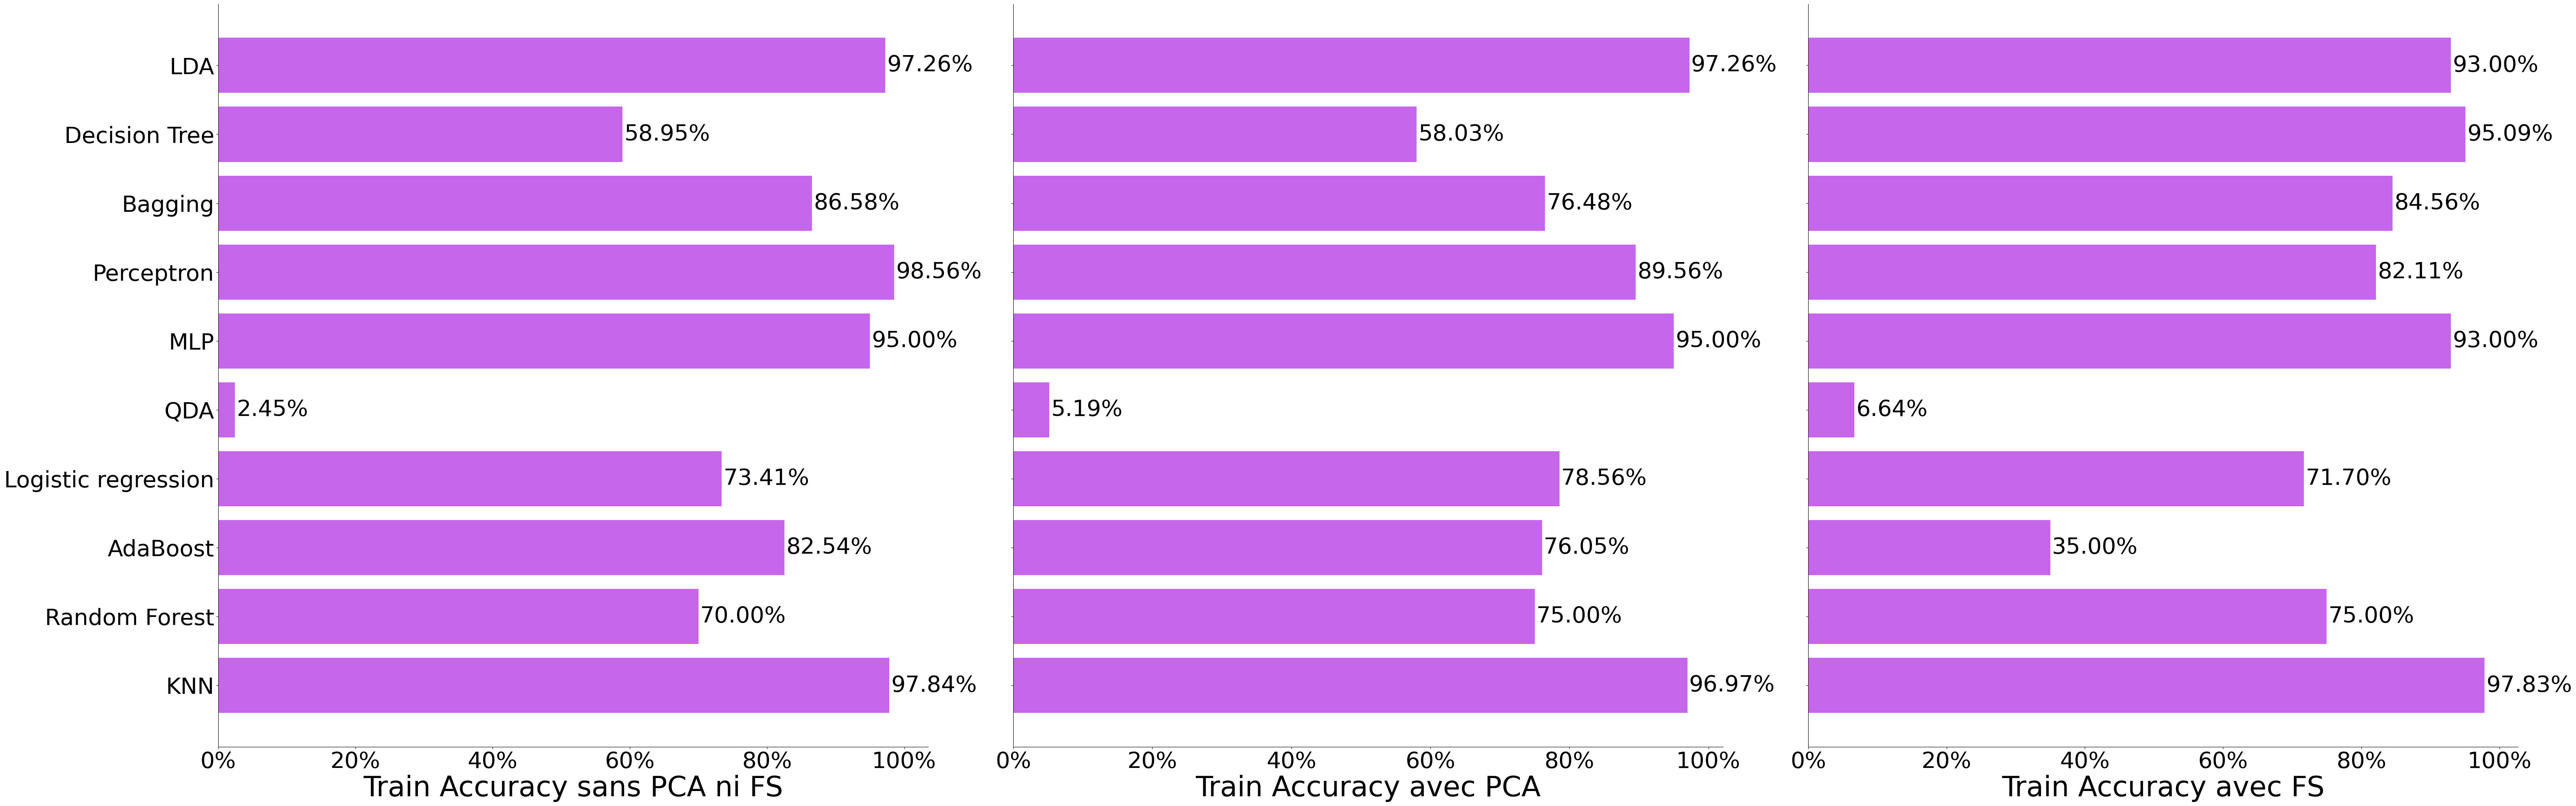

In [18]:
# Les classificateurs
classifiers = ['LDA', 'Decision Tree', 'Bagging', 'Perceptron', 'MLP','QDA', 'Logistic regression', 'AdaBoost',
               'Random Forest', 'KNN']
classifiers.reverse()

# Définir des couleurs pour chaque métrique
accuracy_color = '#c667eb'
precision_color = '#c667eb'
f1_color = '#c667eb'

# Valeurs de métriques 
train = train[::-1]
train_pca = train_pca[::-1]
trai_fs = train_fs[::-1]

# Graphiques en barres
def plot_bar(ax, metric_values, metric_name, color):
    bars = ax.barh(classifiers, metric_values, color=color)  
    ax.set_xlabel(metric_name, fontsize=50)  
    ax.set_xticklabels([f'{tick * 100:.0f}%' for tick in ax.get_xticks()], fontsize=40)  

    # Ajouter les valeurs en pourcentage à droite des barres
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.2%}', 
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0), 
                    textcoords='offset points',
                    ha='left', va='center', fontsize=40, color='black')

# Créer des sous-graphiques pour les quatre métriques
fig, axes = plt.subplots(1, 3, figsize=(60, 20), sharey=True)  # Adjust the number of subplots and figsize

# Tracé pour Grid Search + CV
plot_bar(axes[0], train, 'Train Accuracy sans PCA ni FS', accuracy_color)
plot_bar(axes[1], train_pca, 'Train Accuracy avec PCA', precision_color)
plot_bar(axes[2], trai_fs, 'Train Accuracy avec FS', f1_color)

# Ajuster la disposition pour éviter la coupure des étiquettes
plt.tight_layout()

for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_yticklabels([],fontsize=12)  # Remove y-axis labels

# Définir le y-axis label uniquement sur le premier subplot
axes[0].set_yticks(np.arange(len(classifiers)))  # Position the label at the center of each bar
axes[0].set_yticklabels(classifiers, rotation='horizontal', fontsize=40)

# Afficher le graphique
plt.show()


- No feature trimming

In [19]:
# Définir la taille et la résolution de la figure avec une hauteur accrue pour les sous-graphiques et les images
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(40, 35), dpi=300)

# Afficher les courbes d'apprentissage enregistrées dans le chemin spécifié
for i, ax in enumerate(axes.flatten()):
    img_path = f'./Plots/plot{i+1}.png'

    # Check if the file exists before attempting to read it
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)

        # Afficher l'image avec largeur et hauteur
        ax.imshow(img, aspect='auto')
        ax.axis('off')
    else:
        ax.axis('off')

# Ajuster la disposition pour une meilleure visualisation
plt.tight_layout(pad=1.0)
plt.show()


C:\Users\asst1001\AppData\Local\Temp\ipykernel_15468\1484803422.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{tick * 100:.0f}%' for tick in ax.get_xticks()], fontsize=40)


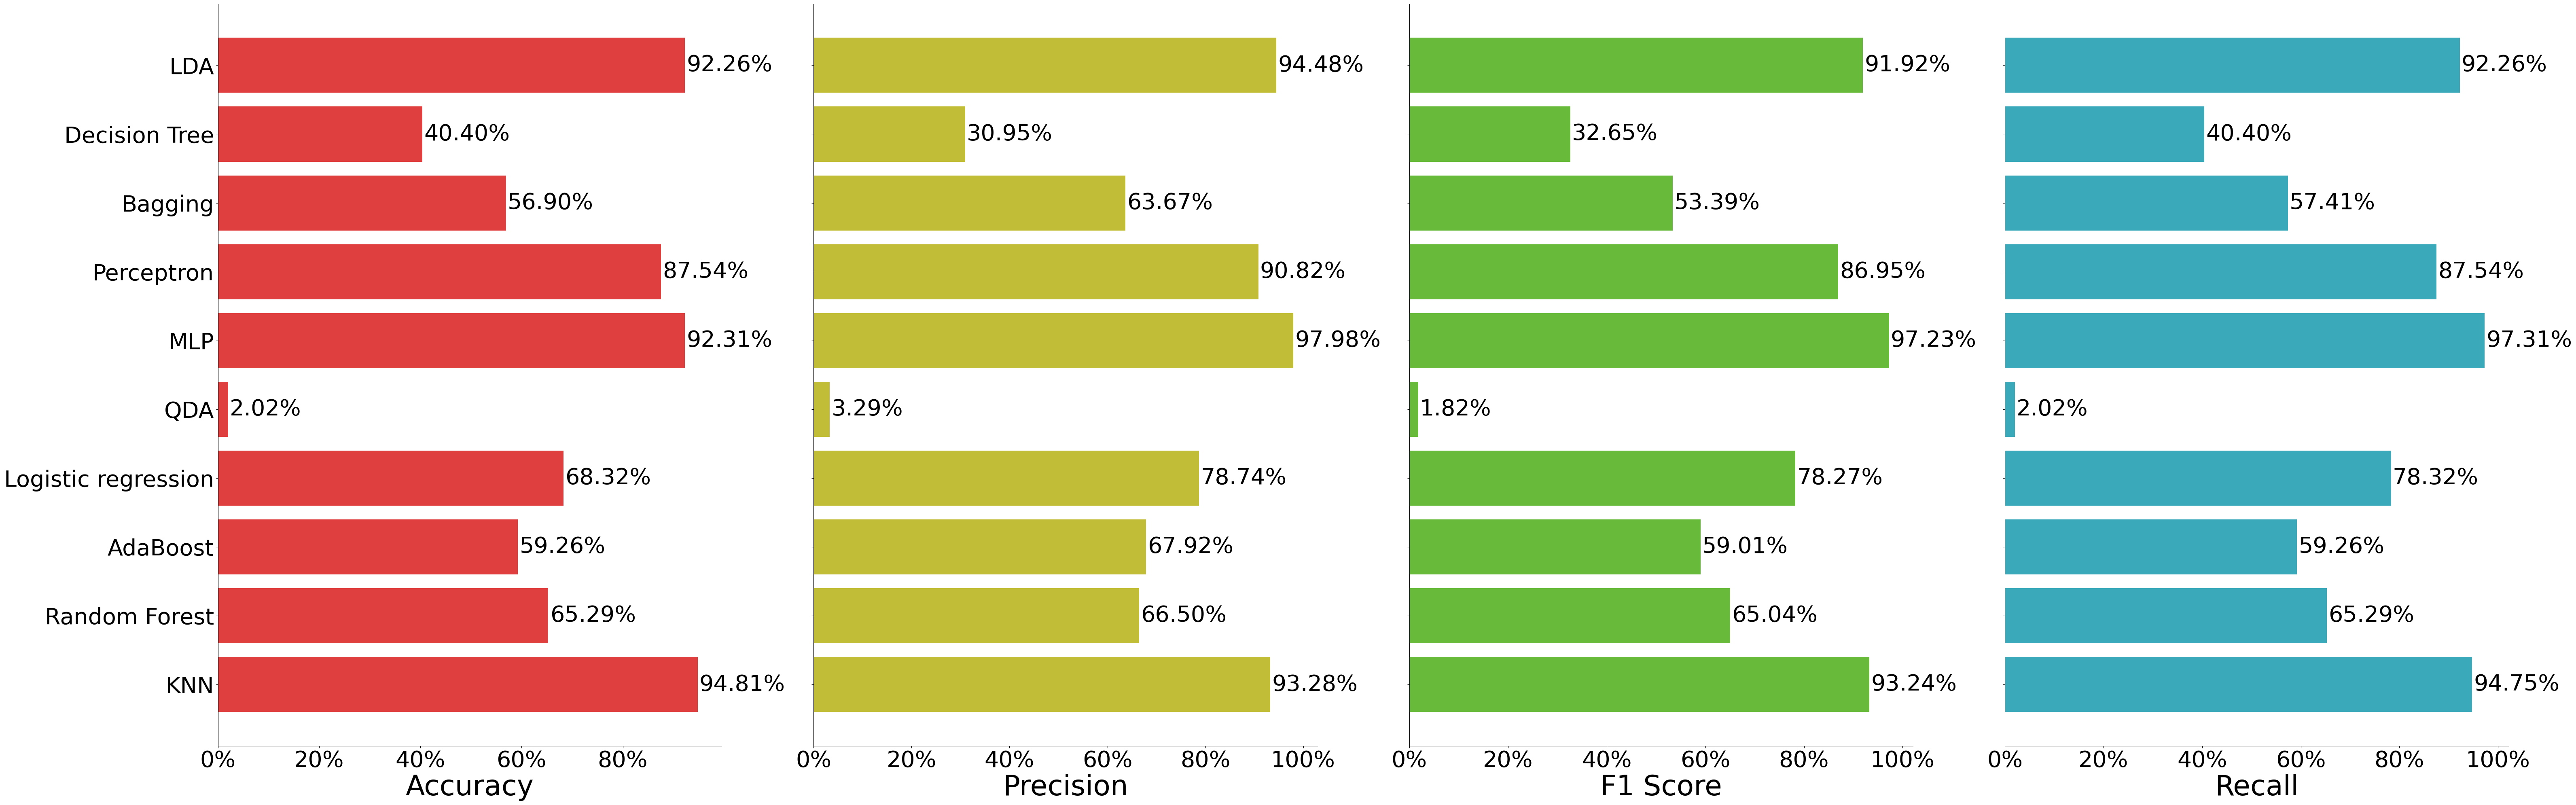

In [20]:
# Les classificateurs
classifiers = ['LDA', 'Decision Tree', 'Bagging', 'Perceptron', 'MLP','QDA', 'Logistic regression', 'AdaBoost',
               'Random Forest', 'KNN']
classifiers.reverse()

# Définir des couleurs pour chaque métrique
accuracy_color = '#e03f3f'
precision_color = '#c2bd36'
f1_color = '#67ba3a'
recall_color = '#3aa9ba'

# Valeurs de métriques 
accuracy_values_gs_cv = accuracy_values[::-1]
precision_values_gs_cv = precision_values[::-1]
f1_values_gs_cv = f1_values[::-1]
recall_values_gs_cv = recall_values[::-1]

# Graphiques en barres
def plot_bar(ax, metric_values, metric_name, color):
    bars = ax.barh(classifiers, metric_values, color=color)  
    ax.set_xlabel(metric_name, fontsize=50)  
    ax.set_xticklabels([f'{tick * 100:.0f}%' for tick in ax.get_xticks()], fontsize=40)  

    # Ajouter les valeurs en pourcentage à droite des barres
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.2%}', 
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0), 
                    textcoords='offset points',
                    ha='left', va='center', fontsize=40, color='black')

# Créer des sous-graphiques pour les quatre métriques
fig, axes = plt.subplots(1, 4, figsize=(60, 20), sharey=True)  # Adjust the number of subplots and figsize

# Tracé pour Grid Search + CV
plot_bar(axes[0], accuracy_values_gs_cv, 'Accuracy', accuracy_color)
plot_bar(axes[1], precision_values_gs_cv, 'Precision', precision_color)
plot_bar(axes[2], f1_values_gs_cv, 'F1 Score', f1_color)
plot_bar(axes[3], recall_values_gs_cv, 'Recall', recall_color)

# Ajuster la disposition pour éviter la coupure des étiquettes
plt.tight_layout()

for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_yticklabels([],fontsize=12)  # Remove y-axis labels

# Définir le y-axis label uniquement sur le premier subplot
axes[0].set_yticks(np.arange(len(classifiers)))  # Position the label at the center of each bar
axes[0].set_yticklabels(classifiers, rotation='horizontal', fontsize=40)

# Afficher le graphique
plt.show()


- PCA 

In [21]:
# Définir la taille et la résolution de la figure avec une hauteur accrue pour les sous-graphiques et les images
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(40, 35), dpi=300)

# Afficher les courbes d'apprentissage enregistrées dans le chemin spécifié
for i, ax in enumerate(axes.flatten()):
    img_path = f'./Plots/plotPCA{i+1}.png'

    # Check if the file exists before attempting to read it
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)

        # Afficher l'image avec largeur et hauteur
        ax.imshow(img, aspect='auto')
        ax.set_title(f'Graphique {i+1}', fontsize=20)
        ax.axis('off')
    else:
        ax.axis('off')

# Ajuster la disposition pour une meilleure visualisation
plt.tight_layout(pad=1.0)
plt.show()


C:\Users\asst1001\AppData\Local\Temp\ipykernel_15468\1761804813.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{tick * 100:.0f}%' for tick in ax.get_xticks()], fontsize=40)


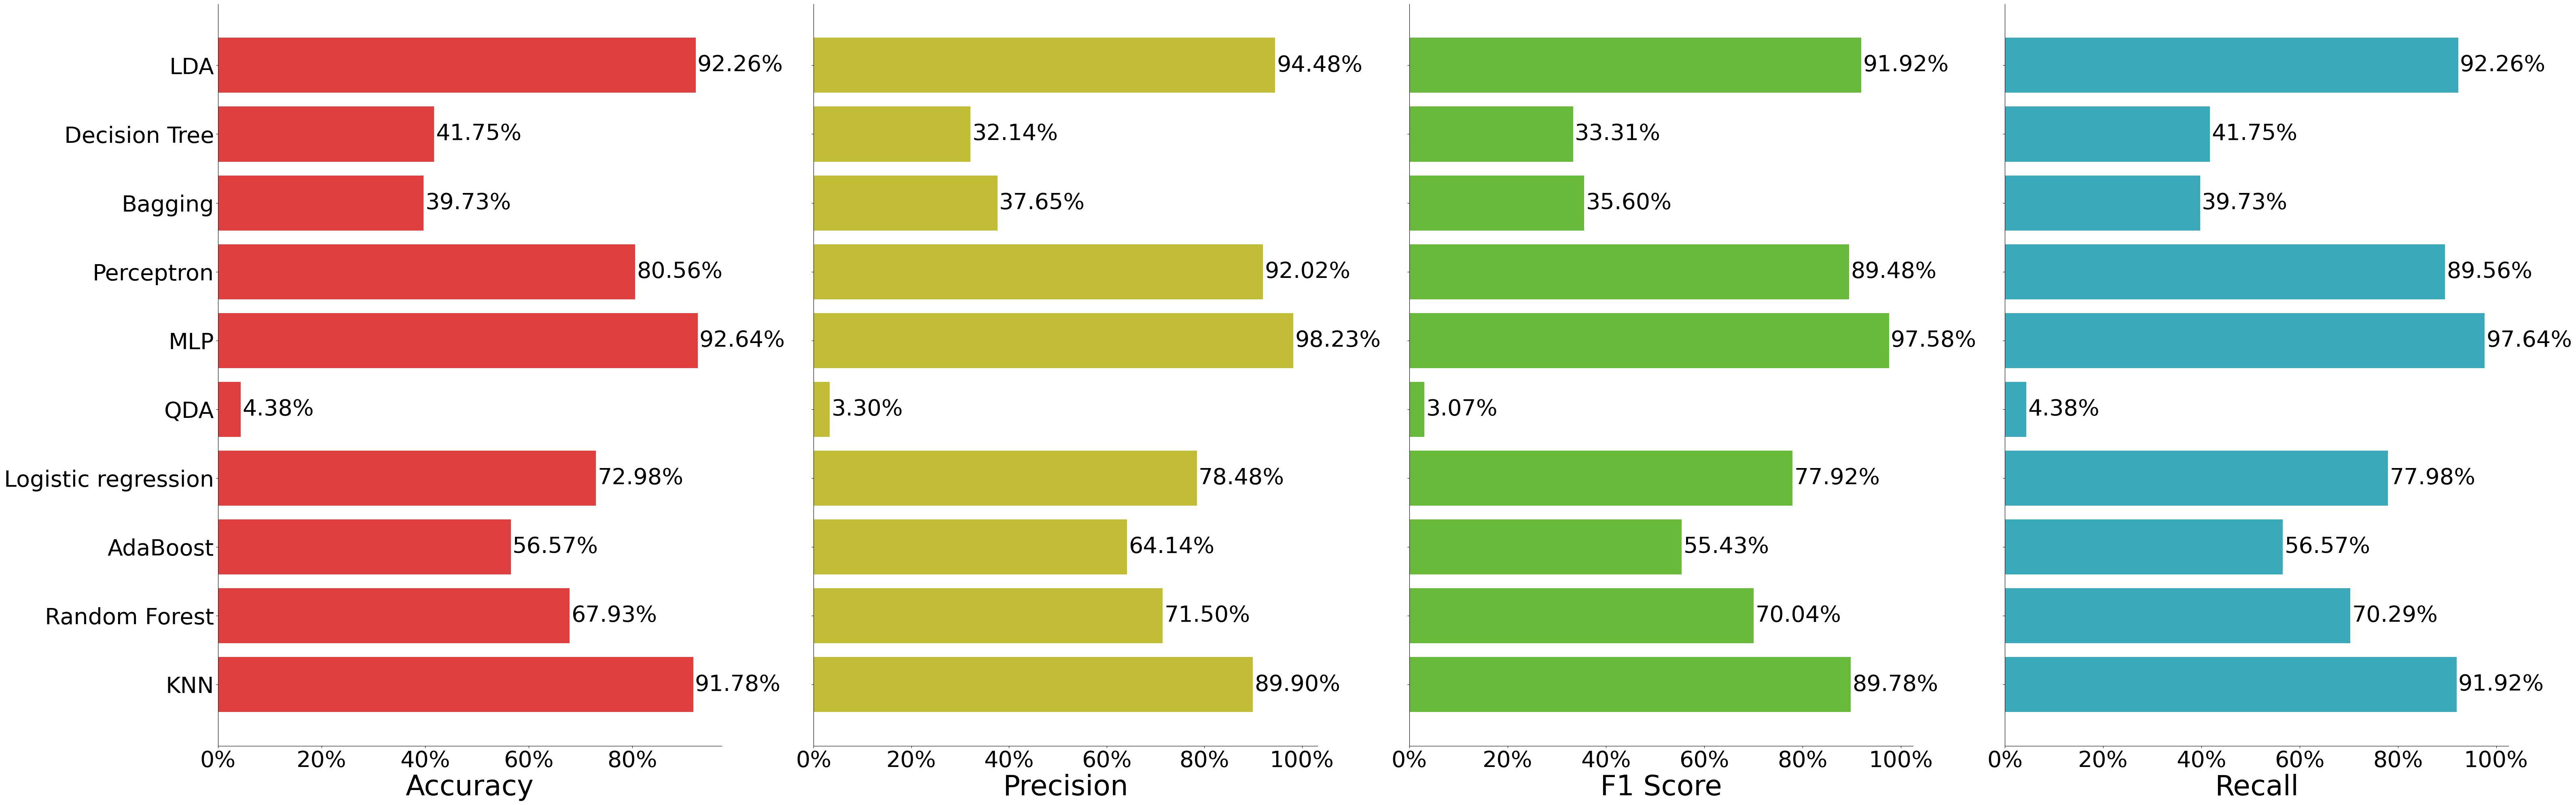

In [22]:
# Les classificateurs
classifiers = ['LDA', 'Decision Tree', 'Bagging', 'Perceptron', 'MLP','QDA', 'Logistic regression', 'AdaBoost',
               'Random Forest', 'KNN']
classifiers.reverse()

# Définir des couleurs pour chaque métrique
accuracy_color = '#e03f3f'
precision_color = '#c2bd36'
f1_color = '#67ba3a'
recall_color = '#3aa9ba'

# Valeurs de métriques 
accuracy_values_gs_cv = accuracy_values_pca[::-1]
precision_values_gs_cv = precision_values_pca[::-1]
f1_values_gs_cv = f1_values_pca[::-1]
recall_values_gs_cv = recall_values_pca[::-1]

# Graphiques en barres
def plot_bar(ax, metric_values, metric_name, color):
    bars = ax.barh(classifiers, metric_values, color=color)  
    ax.set_xlabel(metric_name, fontsize=50)  
    ax.set_xticklabels([f'{tick * 100:.0f}%' for tick in ax.get_xticks()], fontsize=40)  

    # Ajouter les valeurs en pourcentage à droite des barres
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.2%}', 
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0), 
                    textcoords='offset points',
                    ha='left', va='center', fontsize=40, color='black')

# Créer des sous-graphiques pour les quatre métriques
fig, axes = plt.subplots(1, 4, figsize=(60, 20), sharey=True)  # Adjust the number of subplots and figsize

# Tracé pour Grid Search + CV
plot_bar(axes[0], accuracy_values_gs_cv, 'Accuracy', accuracy_color)
plot_bar(axes[1], precision_values_gs_cv, 'Precision', precision_color)
plot_bar(axes[2], f1_values_gs_cv, 'F1 Score', f1_color)
plot_bar(axes[3], recall_values_gs_cv, 'Recall', recall_color)

# Ajuster la disposition pour éviter la coupure des étiquettes
plt.tight_layout()

for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_yticklabels([],fontsize=12)  # Remove y-axis labels

# Définir le y-axis label uniquement sur le premier subplot
axes[0].set_yticks(np.arange(len(classifiers)))  # Position the label at the center of each bar
axes[0].set_yticklabels(classifiers, rotation='horizontal', fontsize=40)

# Afficher le graphique
plt.show()


- Forward Selection

In [23]:
# Définir la taille et la résolution de la figure avec une hauteur accrue pour les sous-graphiques et les images
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(40, 35), dpi=300)

# Afficher les courbes d'apprentissage enregistrées dans le chemin spécifié
for i, ax in enumerate(axes.flatten()):
    img_path = f'./Plots/plotFS{i+1}.png'

    # Check if the file exists before attempting to read it
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)

        # Afficher l'image avec largeur et hauteur
        ax.imshow(img, aspect='auto')
        ax.set_title(f'Graphique {i+1}', fontsize=20)
        ax.axis('off')
    else:
        ax.axis('off')

# Ajuster la disposition pour une meilleure visualisation
plt.tight_layout(pad=1.0)
plt.show()


C:\Users\asst1001\AppData\Local\Temp\ipykernel_15468\3995562025.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{tick * 100:.0f}%' for tick in ax.get_xticks()], fontsize=40)


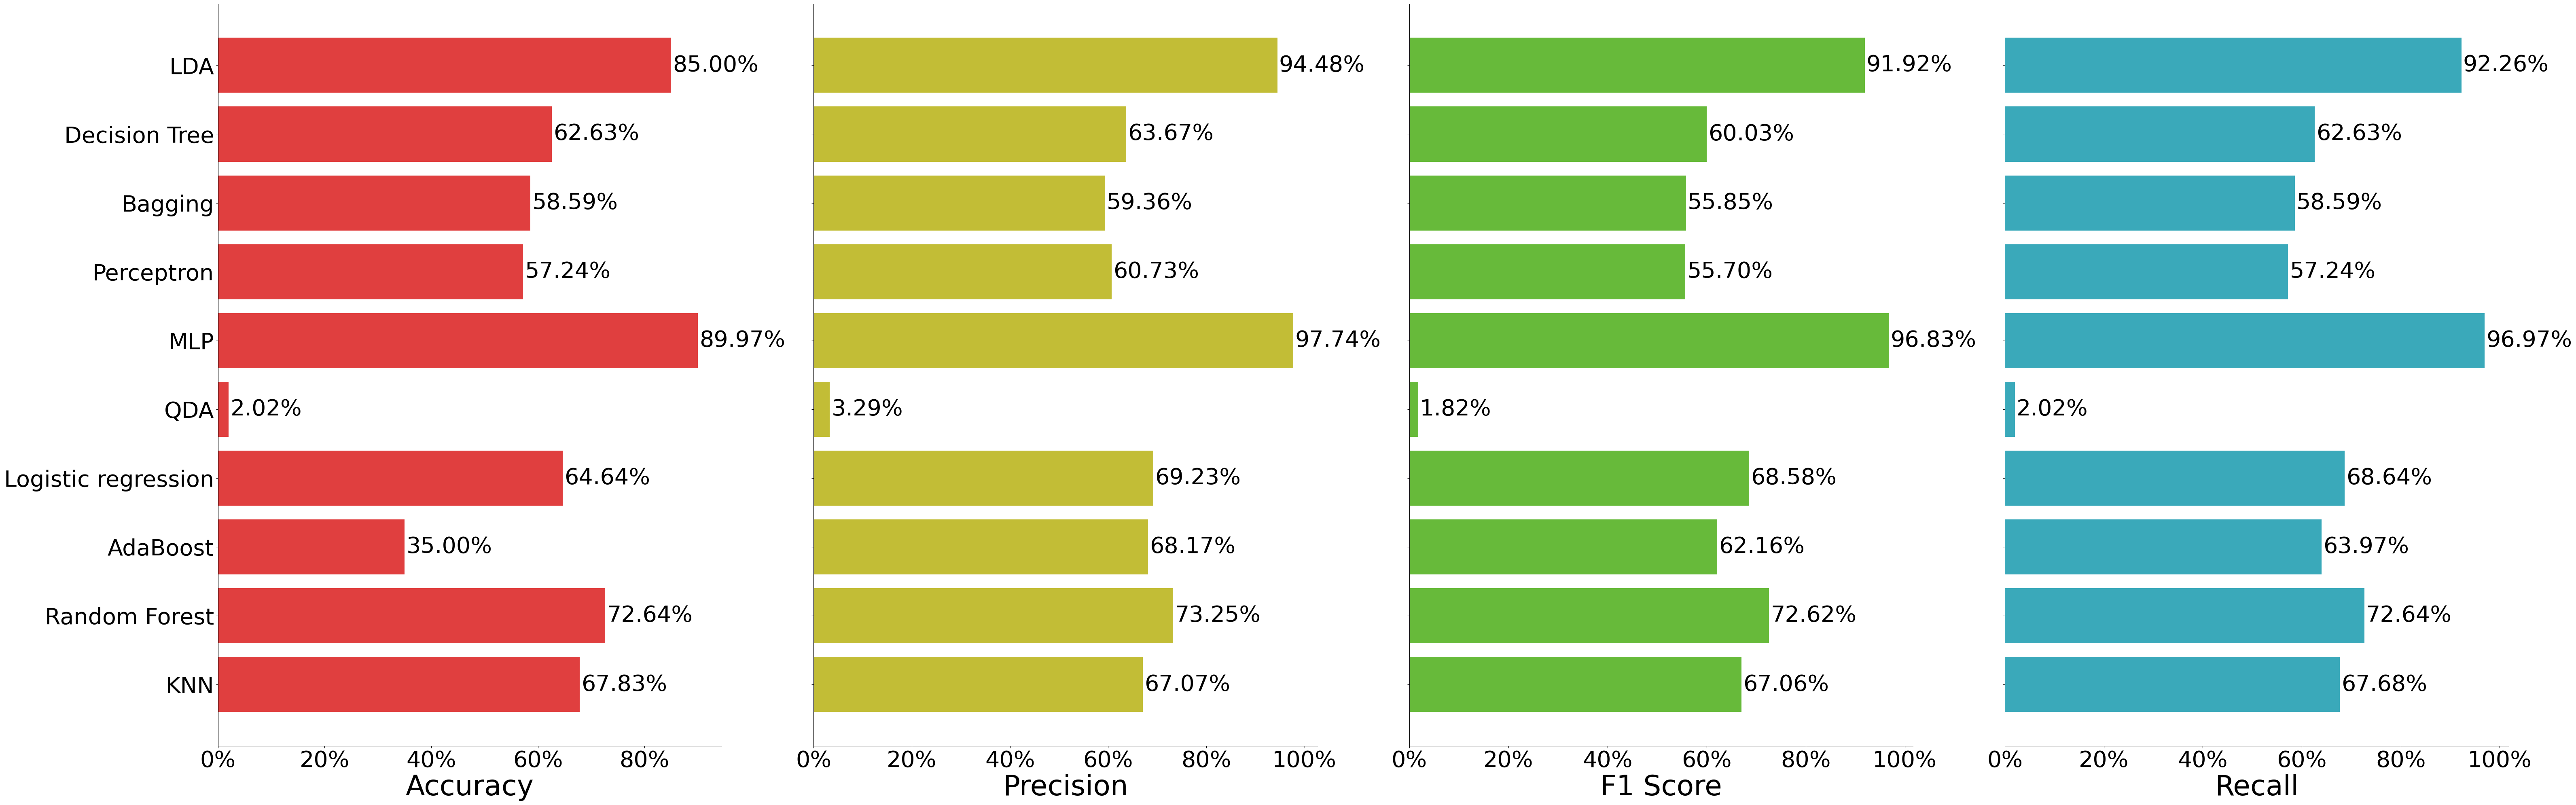

In [24]:
# Les classificateurs
classifiers = ['LDA', 'Decision Tree', 'Bagging', 'Perceptron', 'MLP','QDA', 'Logistic regression', 'AdaBoost',
               'Random Forest', 'KNN']
classifiers.reverse()

# Définir des couleurs pour chaque métrique
accuracy_color = '#e03f3f'
precision_color = '#c2bd36'
f1_color = '#67ba3a'
recall_color = '#3aa9ba'

# Valeurs de métriques 
accuracy_values_gs_cv = accuracy_values_fs[::-1]
precision_values_gs_cv = precision_values_fs[::-1]
f1_values_gs_cv = f1_values_fs[::-1]
recall_values_gs_cv = recall_values_fs[::-1]

# Graphiques en barres
def plot_bar(ax, metric_values, metric_name, color):
    bars = ax.barh(classifiers, metric_values, color=color)  
    ax.set_xlabel(metric_name, fontsize=50)  
    ax.set_xticklabels([f'{tick * 100:.0f}%' for tick in ax.get_xticks()], fontsize=40)  

    # Ajouter les valeurs en pourcentage à droite des barres
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.2%}', 
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0), 
                    textcoords='offset points',
                    ha='left', va='center', fontsize=40, color='black')

# Créer des sous-graphiques pour les quatre métriques
fig, axes = plt.subplots(1, 4, figsize=(60, 20), sharey=True)  # Adjust the number of subplots and figsize

# Tracé pour Grid Search + CV
plot_bar(axes[0], accuracy_values_gs_cv, 'Accuracy', accuracy_color)
plot_bar(axes[1], precision_values_gs_cv, 'Precision', precision_color)
plot_bar(axes[2], f1_values_gs_cv, 'F1 Score', f1_color)
plot_bar(axes[3], recall_values_gs_cv, 'Recall', recall_color)

# Ajuster la disposition pour éviter la coupure des étiquettes
plt.tight_layout()

for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_yticklabels([],fontsize=12)  # Remove y-axis labels

# Définir le y-axis label uniquement sur le premier subplot
axes[0].set_yticks(np.arange(len(classifiers)))  # Position the label at the center of each bar
axes[0].set_yticklabels(classifiers, rotation='horizontal', fontsize=40)

# Afficher le graphique
plt.show()
